In [181]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [182]:
df = pd.read_csv('data/data.csv')

In [183]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [184]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Train Test Split

In [185]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data.shape, test_data.shape

((800, 8), (200, 8))

##### Target Column Separation

In [186]:
X_train = train_data.drop(columns=['math_score'],axis=1)

X_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
29,female,group D,master's degree,standard,none,70,75
535,female,group C,bachelor's degree,free/reduced,completed,83,83
695,female,group D,some college,free/reduced,none,89,86
557,male,group C,master's degree,free/reduced,none,67,66
836,male,group E,high school,standard,none,64,57


In [187]:
y_train = train_data['math_score']

y_train.head()

29     62
535    66
695    79
557    61
836    73
Name: math_score, dtype: int64

In [188]:
# y_train = pd.DataFrame(y_train)

# y_train.head()

In [189]:
y_train_array = np.array(y_train)

y_train_array[:5]

array([62, 66, 79, 61, 73])

In [190]:
X_test = test_data.drop(columns=['math_score'],axis=1)

X_test.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
521,female,group C,associate's degree,standard,none,86,84
737,female,group B,some college,free/reduced,completed,66,73
740,male,group D,bachelor's degree,standard,none,73,72
660,male,group C,some college,free/reduced,none,77,73
411,male,group E,some college,standard,completed,83,78


In [191]:
y_test = test_data['math_score']

y_test.head()

521    91
737    53
740    80
660    74
411    84
Name: math_score, dtype: int64

In [192]:
# y_test = pd.DataFrame(y_test)

# y_test.head()

In [193]:
y_test_array = np.array(y_test)

y_test_array[:5]

array([91, 53, 80, 74, 84])

In [194]:
numerical_columns = ['writing_score', 'reading_score']
categorical_columns = ['gender',
                       'race_ethnicity',
                       'parental_level_of_education',
                       'lunch',
                       'test_preparation_course']

#### Data Transformation

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Creating a pipeline to standard scaling numerical columns
numerical_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),  # Handling missing values
           ('scaler', StandardScaler())                    # Performing standard scaling
           ])

 # Creating a pipeling to encoding categorical columns
categorical_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder())
        ])

In [196]:
from sklearn.compose import ColumnTransformer

# Combining numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
    ])

#### Apply Data Transformation

In [197]:
# Applying data transformation(preprocessing object) on training and testing dataframe.

X_train_array = preprocessor.fit_transform(X_train)
X_test_array = preprocessor.transform(X_test)

In [198]:
X_train_array[0]

array([0.43405338, 0.03079054, 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        ])

In [199]:
X_test_array[0]

array([1.03103224, 1.13786619, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        ])

In [200]:
X_train_array.shape, X_test_array.shape

((800, 19), (200, 19))

### Model Train

In [201]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [202]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [204]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_array, y_train_array) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_array)
    y_test_pred = model.predict(X_test_array)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train_array, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test_array, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5923
- Mean Absolute Error: 5.2050
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5174
- Mean Absolute Error: 5.1559
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806




c:\Users\GD\venvs\envAI\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\GD\venvs\envAI\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\GD\AppData\Roaming\uv\python\cpython-3.10.18-windows-x86_64-none\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\GD\AppData\Roaming\uv\python\cpython-3.10.18-windows-x86_64-none\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\GD\AppData\Roaming\uv\python\cpython-3.10.18-windows-x86_64-none\lib\subproces

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6955
- Mean Absolute Error: 4.5048
- R2 Score: 0.8561
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2141
- Mean Absolute Error: 5.5790
- R2 Score: 0.7861


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8387
- Mean Absolute Error: 6.1450
- R2 Score: 0.7475


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2965
- Mean Absolute Error: 1.8191
- R2 Score: 0.9766
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9705
- Mean Absolute Error: 4.6078
- R2 Score: 0.8535


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
--

### Results

In [205]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853508
7,CatBoosting Regressor,0.852356
8,AdaBoost Regressor,0.848110
1,Lasso,0.825441
6,XGBRegressor,0.823090
3,K-Neighbors Regressor,0.786127
4,Decision Tree,0.747492


#### Ridge Model

In [206]:
rid_model = Ridge(fit_intercept=True)
rid_model = rid_model.fit(X_train_array, y_train_array)
y_pred = rid_model.predict(X_test_array)
score = r2_score(y_test_array, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


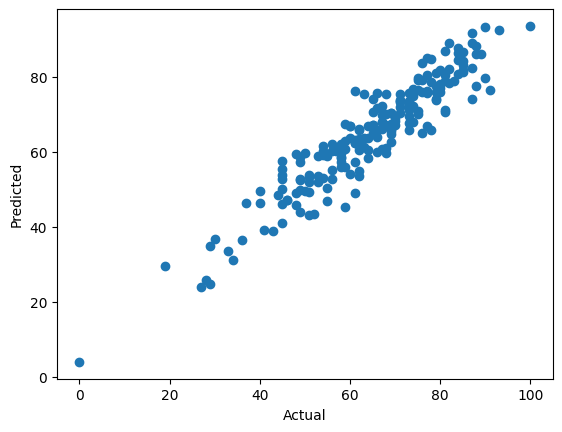

In [207]:
plt.scatter(y_test_array,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');